<a href="https://colab.research.google.com/github/Panperception/TutorialDL/blob/main/Zhejian%20Huang%20ECG_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Test on ECG Data

The dataset you will use is based on one from [timeseriesclassification.com](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000).

Try to design and train your MLP to classify normal and abnormal ECG samples.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model




# Download the dataset
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values




In [ ]:
# The last element contains the labels
labels = raw_data[:, -1]

# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=21)

#Normalize to [0, 1]
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

inputside=140
hidensize=10
classnum=2
epochnum=30 ## or 10, 20

In [ ]:
# plt.grid()
# plt.plot(np.arange(140), train_data[100])
# plt.show()

# MLP

In [ ]:


mlp_model = keras.Sequential()
mlp_model.add(keras.Input(shape=(inputside,)))
mlp_model.add(keras.layers.Dense(hidensize, activation='sigmoid', 
                activity_regularizer=keras.regularizers.l1(10e-5)))
mlp_model.add(keras.layers.Dense(classnum, activation='sigmoid'))
mlp_model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Convert labels to categorical one-hot encoding
train_hot_labels = keras.utils.to_categorical(train_labels, num_classes=classnum)
test_hot_labels=keras.utils.to_categorical(test_labels, num_classes=classnum)
# Train the model, iterating on the data in batches of 32 samples
mlp_history=mlp_model.fit(train_data, train_hot_labels,validation_data=(test_data,test_hot_labels), epochs=epochnum, batch_size=32)

Epoch 1/30
125/125 [==============================] - 1s 3ms/step - loss: 0.6846 - accuracy: 0.5809 - val_loss: 0.6853 - val_accuracy: 0.5600
Epoch 2/30
125/125 [==============================] - 0s 2ms/step - loss: 0.6708 - accuracy: 0.5956 - val_loss: 0.6814 - val_accuracy: 0.5600
Epoch 3/30
125/125 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.5876 - val_loss: 0.6786 - val_accuracy: 0.5600
Epoch 4/30
125/125 [==============================] - 0s 2ms/step - loss: 0.6671 - accuracy: 0.5907 - val_loss: 0.6752 - val_accuracy: 0.5600
Epoch 5/30
125/125 [==============================] - 0s 2ms/step - loss: 0.6637 - accuracy: 0.5935 - val_loss: 0.6730 - val_accuracy: 0.5600
Epoch 6/30
125/125 [==============================] - 0s 2ms/step - loss: 0.6604 - accuracy: 0.5930 - val_loss: 0.6695 - val_accuracy: 0.5600
Epoch 7/30
125/125 [==============================] - 0s 2ms/step - loss: 0.6565 - accuracy: 0.5933 - val_loss: 0.6656 - val_accuracy: 0.5600
Epoch 

F1 Score:   0.9506398311882227
Precision:  0.9599520865792164
Recall:     0.945698051948052
Accuracy:   0.952


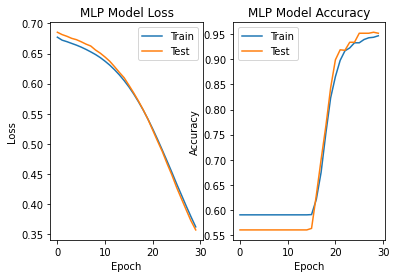

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import numpy as np

# Overall F1 score
pred_labels=np.argmax(mlp_model.predict(test_data), axis=1)
print("F1 Score:  ", f1_score(test_labels, pred_labels, average="macro"))
print("Precision: ", precision_score(test_labels, pred_labels, average="macro"))
print("Recall:    ", recall_score(test_labels, pred_labels, average="macro"))
print("Accuracy:  ", np.mean((test_labels==pred_labels)*1.0))

plt.figure()
plt.subplot(121)
plt.plot(mlp_history.history['loss'])
plt.plot(mlp_history.history['val_loss'])

plt.title('MLP Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])

plt.subplot(122)

plt.plot(mlp_history.history['accuracy'])
plt.plot(mlp_history.history['val_accuracy'])

plt.title('MLP Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()
plt.close()

More about the dataset from the link,
"The original dataset for "ECG5000" is a 20-hour long ECG downloaded from Physionet. The name is BIDMC Congestive Heart Failure Database(chfdb) and it is record "chf07". It was originally published in "Goldberger AL, Amaral LAN, Glass L, Hausdorff JM, Ivanov PCh, Mark RG, Mietus JE, Moody GB, Peng C-K, Stanley HE. PhysioBank, PhysioToolkit, and PhysioNet: Components of a New Research Resource for Complex Physiologic Signals. Circulation 101(23)". The data was pre-processed in two steps: (1) extract each heartbeat, (2) make each heartbeat equal length using interpolation. This dataset was originally used in paper "A general framework for never-ending learning from time series streams", DAMI 29(6). After that, 5,000 heartbeats were randomly selected. The patient has severe congestive heart failure and the class values were obtained by automated annotation"

See [link dataset](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000) 

# AE

In [ ]:
# Claim models
import keras
import matplotlib.pyplot as plt

# The input size/image
input = keras.Input(shape=(inputside,))
# The size of latent space
encoding_dim = 16
## Add a simple encode layer
# Rectified Linear Unit
encoded = keras.layers.Dense(encoding_dim, activation='sigmoid')(input)
# Add decode layer
decoded = keras.layers.Dense(inputside, activation='sigmoid')(encoded)

# Claim autoencoder model
model_autoencoder = keras.Model(input, decoded)

# Claim a separate encoder model
model_encoder = keras.Model(input, encoded)

# Claim a separate decoder model
decoder_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = model_autoencoder.layers[-1]
# Create the decoder model
model_decoder = keras.Model(decoder_input, decoder_layer(decoder_input))


# input = Input(shape=(28*28,))
# encoded = keras.layers.Dense(encoding_dim, activation='sigmoid')(input)
# decoded = keras.layers.Dense(784, activation='sigmoid')(encoded)

# model_decoder = keras.Model(input=input, output=decoded)


Epoch 1/20
16/16 [==============================] - 1s 27ms/step - loss: 0.6971 - val_loss: 0.6920
Epoch 2/20
16/16 [==============================] - 0s 6ms/step - loss: 0.6912 - val_loss: 0.6894
Epoch 3/20
16/16 [==============================] - 0s 5ms/step - loss: 0.6889 - val_loss: 0.6875
Epoch 4/20
16/16 [==============================] - 0s 5ms/step - loss: 0.6871 - val_loss: 0.6860
Epoch 5/20
16/16 [==============================] - 0s 5ms/step - loss: 0.6856 - val_loss: 0.6849
Epoch 6/20
16/16 [==============================] - 0s 5ms/step - loss: 0.6847 - val_loss: 0.6843
Epoch 7/20
16/16 [==============================] - 0s 6ms/step - loss: 0.6841 - val_loss: 0.6840
Epoch 8/20
16/16 [==============================] - 0s 5ms/step - loss: 0.6839 - val_loss: 0.6839
Epoch 9/20
16/16 [==============================] - 0s 6ms/step - loss: 0.6838 - val_loss: 0.6839
Epoch 10/20
16/16 [==============================] - 0s 5ms/step - loss: 0.6837 - val_loss: 0.6839
Epoch 11/20
16/16 

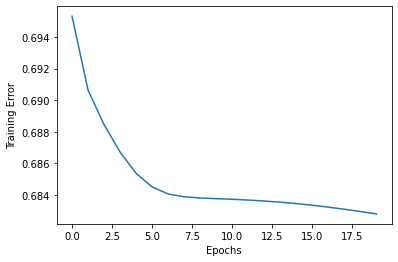

In [ ]:
# Training
# Claim compile property for training
model_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder model
hist=model_autoencoder.fit(train_data, train_data,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(test_data, test_data))

plt.plot(hist.history["loss"]);
plt.xlabel('Epochs');
plt.ylabel('Training Error');

In [ ]:
AE_model = keras.Sequential()
AE_model.add(model_encoder.layers[0])
AE_model.add(model_encoder.layers[1])
AE_model.add(keras.layers.Dense(classnum, activation='sigmoid'))
AE_model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Convert labels to categorical one-hot encoding
train_hot_labels = keras.utils.to_categorical(train_labels, num_classes=classnum)
test_hot_labels=keras.utils.to_categorical(test_labels, num_classes=classnum)

# Train the model, iterating on the data in batches of 32 samples
AE_history=AE_model.fit(train_data, train_hot_labels,validation_data=(test_data,test_hot_labels), epochs=epochnum, batch_size=32)


Epoch 1/30
125/125 [==============================] - 1s 3ms/step - loss: 0.6741 - accuracy: 0.6042 - val_loss: 0.5938 - val_accuracy: 0.6310
Epoch 2/30
125/125 [==============================] - 0s 2ms/step - loss: 0.5802 - accuracy: 0.6755 - val_loss: 0.5657 - val_accuracy: 0.6470
Epoch 3/30
125/125 [==============================] - 0s 1ms/step - loss: 0.5485 - accuracy: 0.7331 - val_loss: 0.5338 - val_accuracy: 0.8880
Epoch 4/30
125/125 [==============================] - 0s 2ms/step - loss: 0.5225 - accuracy: 0.8849 - val_loss: 0.5056 - val_accuracy: 0.9270
Epoch 5/30
125/125 [==============================] - 0s 2ms/step - loss: 0.4973 - accuracy: 0.9104 - val_loss: 0.4804 - val_accuracy: 0.9260
Epoch 6/30
125/125 [==============================] - 0s 2ms/step - loss: 0.4689 - accuracy: 0.9286 - val_loss: 0.4545 - val_accuracy: 0.9420
Epoch 7/30
125/125 [==============================] - 0s 2ms/step - loss: 0.4470 - accuracy: 0.9305 - val_loss: 0.4318 - val_accuracy: 0.9410
Epoch 

F1 Score:   0.9509545471265495
Precision:  0.9551450099751034
Recall:     0.9481331168831169
Accuracy:   0.952


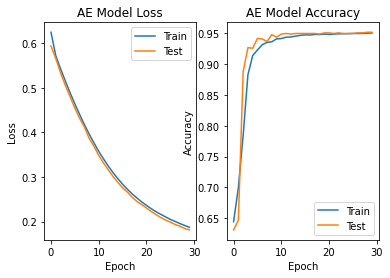

In [ ]:

# Overall F1 score
pred_labels=np.argmax(AE_model.predict(test_data), axis=1)
print("F1 Score:  ", f1_score(test_labels, pred_labels, average="macro"))
print("Precision: ", precision_score(test_labels, pred_labels, average="macro"))
print("Recall:    ", recall_score(test_labels, pred_labels, average="macro"))
print("Accuracy:  ", np.mean((test_labels==pred_labels)*1.0))

plt.figure()
plt.subplot(121)
plt.plot(AE_history.history['loss'])
plt.plot(AE_history.history['val_loss'])

plt.title('AE Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])

plt.subplot(122)

plt.plot(AE_history.history['accuracy'])
plt.plot(AE_history.history['val_accuracy'])

plt.title('AE Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()
plt.close()

#CNN

In [ ]:
print(inputside)

140


In [ ]:
train_data= np.array(train_data)
test_data= np.array(test_data)

train_data_reshape= train_data.reshape(len(train_data), 10, 14, 1)
test_data_reshape= test_data.reshape(len(test_data), 10, 14, 1)


#Deep CNN model setting
CNN= keras.Sequential()

CNN.add(keras.layers.Conv2D(10, kernel_size= 5, activation='tanh', input_shape= (14, 10, 1), padding= 'same'))
#CNN.add(Conv2D(100, kernel_size= 5, activation='tanh'))
CNN.add(keras.layers.Flatten())
CNN.add(keras.layers.Dense(classnum, activation= 'sigmoid'))

#Training and evaluating
CNN.compile(optimizer= 'SGD',
            loss= 'categorical_crossentropy',
            metrics=['accuracy'])

# Convert labels to categorical one-hot encoding
train_hot_labels = keras.utils.to_categorical(train_labels, num_classes=classnum)
test_hot_labels=keras.utils.to_categorical(test_labels, num_classes=classnum)

CNN_history= CNN.fit(train_data_reshape, train_hot_labels, validation_data= (test_data_reshape, test_hot_labels), epochs= epochnum, batch_size=32)


Epoch 1/30
125/125 [==============================] - 1s 7ms/step - loss: 0.6399 - accuracy: 0.6409 - val_loss: 0.5568 - val_accuracy: 0.7600
Epoch 2/30
125/125 [==============================] - 1s 5ms/step - loss: 0.5177 - accuracy: 0.8471 - val_loss: 0.4163 - val_accuracy: 0.9310
Epoch 3/30
125/125 [==============================] - 1s 5ms/step - loss: 0.3750 - accuracy: 0.9412 - val_loss: 0.2828 - val_accuracy: 0.9540
Epoch 4/30
125/125 [==============================] - 1s 5ms/step - loss: 0.2632 - accuracy: 0.9513 - val_loss: 0.2071 - val_accuracy: 0.9570
Epoch 5/30
125/125 [==============================] - 1s 5ms/step - loss: 0.2033 - accuracy: 0.9491 - val_loss: 0.1679 - val_accuracy: 0.9580
Epoch 6/30
125/125 [==============================] - 1s 5ms/step - loss: 0.1711 - accuracy: 0.9508 - val_loss: 0.1468 - val_accuracy: 0.9580
Epoch 7/30
125/125 [==============================] - 1s 5ms/step - loss: 0.1478 - accuracy: 0.9555 - val_loss: 0.1283 - val_accuracy: 0.9590
Epoch 

F1 Score:   0.9776450935044771
Precision:  0.9784159189721711
Recall:     0.976948051948052
Accuracy:   0.978


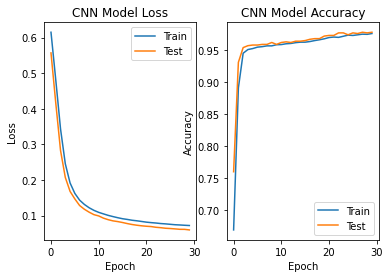

In [ ]:
pred_labels=np.argmax(CNN.predict(test_data_reshape), axis=1)
print("F1 Score:  ", f1_score(test_labels, pred_labels, average="macro"))
print("Precision: ", precision_score(test_labels, pred_labels, average="macro"))
print("Recall:    ", recall_score(test_labels, pred_labels, average="macro"))
print("Accuracy:  ", np.mean((test_labels==pred_labels)*1.0))

plt.figure()
plt.subplot(121)
plt.plot(CNN_history.history['loss'])
plt.plot(CNN_history.history['val_loss'])

plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.subplot(122)

plt.plot(CNN_history.history['accuracy'])
plt.plot(CNN_history.history['val_accuracy'])

plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()
plt.close()

#Hyperparameter Turning in MLP


In [ ]:
# optimizer = Adam
mlp_model_adam = keras.Sequential()
mlp_model_adam.add(keras.Input(shape=(inputside,)))
mlp_model_adam.add(keras.layers.Dense(hidensize, activation='sigmoid', 
                activity_regularizer=keras.regularizers.l1(10e-5)))
mlp_model_adam.add(keras.layers.Dense(classnum, activation='sigmoid'))
mlp_model_adam.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Convert labels to categorical one-hot encoding
train_hot_labels = keras.utils.to_categorical(train_labels, num_classes=classnum)
test_hot_labels=keras.utils.to_categorical(test_labels, num_classes=classnum)
# Train the model, iterating on the data in batches of 32 samples
mlp_history_adam=mlp_model_adam.fit(train_data, train_hot_labels,validation_data=(test_data,test_hot_labels), epochs=epochnum, batch_size=32)

Epoch 1/30
125/125 [==============================] - 1s 5ms/step - loss: 0.6787 - accuracy: 0.5502 - val_loss: 0.6303 - val_accuracy: 0.5600
Epoch 2/30
125/125 [==============================] - 0s 2ms/step - loss: 0.5955 - accuracy: 0.6675 - val_loss: 0.5164 - val_accuracy: 0.9130
Epoch 3/30
125/125 [==============================] - 0s 2ms/step - loss: 0.4837 - accuracy: 0.9017 - val_loss: 0.3933 - val_accuracy: 0.9510
Epoch 4/30
125/125 [==============================] - 0s 2ms/step - loss: 0.3613 - accuracy: 0.9488 - val_loss: 0.2961 - val_accuracy: 0.9550
Epoch 5/30
125/125 [==============================] - 0s 2ms/step - loss: 0.2776 - accuracy: 0.9483 - val_loss: 0.2324 - val_accuracy: 0.9570
Epoch 6/30
125/125 [==============================] - 0s 2ms/step - loss: 0.2186 - accuracy: 0.9537 - val_loss: 0.1884 - val_accuracy: 0.9580
Epoch 7/30
125/125 [==============================] - 0s 2ms/step - loss: 0.1782 - accuracy: 0.9583 - val_loss: 0.1620 - val_accuracy: 0.9580
Epoch 

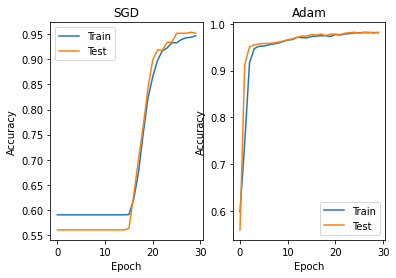

In [ ]:
plt.figure()
plt.subplot(121)
plt.plot(mlp_history.history['accuracy'])
plt.plot(mlp_history.history['val_accuracy'])


plt.title('SGD')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])

plt.subplot(122)

plt.plot(mlp_history_adam.history['accuracy'])
plt.plot(mlp_history_adam.history['val_accuracy'])

plt.title('Adam')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()
plt.close()

In [ ]:
# batch size of 128
mlp_model_128 = keras.Sequential()
mlp_model_128.add(keras.Input(shape=(inputside,)))
mlp_model_128.add(keras.layers.Dense(hidensize, activation='sigmoid', 
                activity_regularizer=keras.regularizers.l1(10e-5)))
mlp_model_128.add(keras.layers.Dense(classnum, activation='sigmoid'))
mlp_model_128.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Convert labels to categorical one-hot encoding
train_hot_labels = keras.utils.to_categorical(train_labels, num_classes=classnum)
test_hot_labels=keras.utils.to_categorical(test_labels, num_classes=classnum)
# Train the model, iterating on the data in batches of 32 samples
mlp_history_128=mlp_model_128.fit(train_data, train_hot_labels,validation_data=(test_data,test_hot_labels), epochs=epochnum, batch_size=128)

Epoch 1/30
32/32 [==============================] - 1s 8ms/step - loss: 0.9737 - accuracy: 0.4092 - val_loss: 0.7351 - val_accuracy: 0.4400
Epoch 2/30
32/32 [==============================] - 0s 3ms/step - loss: 0.7288 - accuracy: 0.4004 - val_loss: 0.6908 - val_accuracy: 0.5600
Epoch 3/30
32/32 [==============================] - 0s 3ms/step - loss: 0.6861 - accuracy: 0.5830 - val_loss: 0.6854 - val_accuracy: 0.5600
Epoch 4/30
32/32 [==============================] - 0s 3ms/step - loss: 0.6746 - accuracy: 0.6016 - val_loss: 0.6850 - val_accuracy: 0.5600
Epoch 5/30
32/32 [==============================] - 0s 3ms/step - loss: 0.6754 - accuracy: 0.5895 - val_loss: 0.6842 - val_accuracy: 0.5600
Epoch 6/30
32/32 [==============================] - 0s 2ms/step - loss: 0.6756 - accuracy: 0.5847 - val_loss: 0.6835 - val_accuracy: 0.5600
Epoch 7/30
32/32 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5855 - val_loss: 0.6822 - val_accuracy: 0.5600
Epoch 8/30
32/32 [==

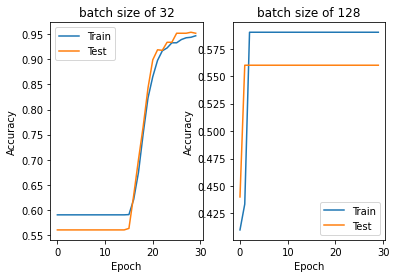

In [ ]:
plt.figure()
plt.subplot(121)
plt.plot(mlp_history.history['accuracy'])
plt.plot(mlp_history.history['val_accuracy'])


plt.title('batch size of 32')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])

plt.subplot(122)

plt.plot(mlp_history_128.history['accuracy'])
plt.plot(mlp_history_128.history['val_accuracy'])

plt.title('batch size of 128')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()
plt.close()

#Hyperparameter Turning in AE



In [ ]:
# optimizer = Adam

AE_model_adam = keras.Sequential()
AE_model_adam.add(model_encoder.layers[0])
AE_model_adam.add(model_encoder.layers[1])
AE_model_adam.add(keras.layers.Dense(classnum, activation='sigmoid'))
AE_model_adam.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Convert labels to categorical one-hot encoding
train_hot_labels = keras.utils.to_categorical(train_labels, num_classes=classnum)
test_hot_labels=keras.utils.to_categorical(test_labels, num_classes=classnum)

# Train the model, iterating on the data in batches of 32 samples
AE_history_adam=AE_model_adam.fit(train_data, train_hot_labels,validation_data=(test_data,test_hot_labels), epochs=epochnum, batch_size=32)


Epoch 1/30
125/125 [==============================] - 1s 3ms/step - loss: 0.6902 - accuracy: 0.5670 - val_loss: 0.5126 - val_accuracy: 0.9080
Epoch 2/30
125/125 [==============================] - 0s 2ms/step - loss: 0.4665 - accuracy: 0.9056 - val_loss: 0.3652 - val_accuracy: 0.9540
Epoch 3/30
125/125 [==============================] - 0s 2ms/step - loss: 0.3334 - accuracy: 0.9498 - val_loss: 0.2636 - val_accuracy: 0.9560
Epoch 4/30
125/125 [==============================] - 0s 2ms/step - loss: 0.2454 - accuracy: 0.9501 - val_loss: 0.2013 - val_accuracy: 0.9590
Epoch 5/30
125/125 [==============================] - 0s 2ms/step - loss: 0.1832 - accuracy: 0.9605 - val_loss: 0.1622 - val_accuracy: 0.9610
Epoch 6/30
125/125 [==============================] - 0s 2ms/step - loss: 0.1509 - accuracy: 0.9606 - val_loss: 0.1373 - val_accuracy: 0.9600
Epoch 7/30
125/125 [==============================] - 0s 2ms/step - loss: 0.1316 - accuracy: 0.9617 - val_loss: 0.1212 - val_accuracy: 0.9610
Epoch 

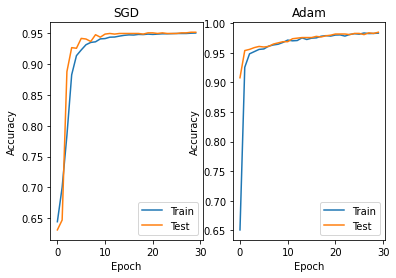

In [ ]:
plt.figure()
plt.subplot(121)
plt.plot(AE_history.history['accuracy'])
plt.plot(AE_history.history['val_accuracy'])


plt.title('SGD')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])

plt.subplot(122)

plt.plot(AE_history_adam.history['accuracy'])
plt.plot(AE_history_adam.history['val_accuracy'])

plt.title('Adam')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()
plt.close()

In [ ]:
# batch size of 128

AE_model_128 = keras.Sequential()
AE_model_128.add(model_encoder.layers[0])
AE_model_128.add(model_encoder.layers[1])
AE_model_128.add(keras.layers.Dense(classnum, activation='sigmoid'))
AE_model_128.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Convert labels to categorical one-hot encoding
train_hot_labels = keras.utils.to_categorical(train_labels, num_classes=classnum)
test_hot_labels=keras.utils.to_categorical(test_labels, num_classes=classnum)

# Train the model, iterating on the data in batches of 32 samples
AE_history_128=AE_model_128.fit(train_data, train_hot_labels,validation_data=(test_data,test_hot_labels), epochs=epochnum, batch_size=128)


Epoch 1/30
32/32 [==============================] - 1s 14ms/step - loss: 0.4766 - accuracy: 0.7108 - val_loss: 0.4311 - val_accuracy: 0.9280
Epoch 2/30
32/32 [==============================] - 0s 3ms/step - loss: 0.4093 - accuracy: 0.9476 - val_loss: 0.3805 - val_accuracy: 0.9610
Epoch 3/30
32/32 [==============================] - 0s 2ms/step - loss: 0.3643 - accuracy: 0.9667 - val_loss: 0.3412 - val_accuracy: 0.9720
Epoch 4/30
32/32 [==============================] - 0s 2ms/step - loss: 0.3318 - accuracy: 0.9717 - val_loss: 0.3099 - val_accuracy: 0.9750
Epoch 5/30
32/32 [==============================] - 0s 2ms/step - loss: 0.2978 - accuracy: 0.9731 - val_loss: 0.2841 - val_accuracy: 0.9780
Epoch 6/30
32/32 [==============================] - 0s 3ms/step - loss: 0.2783 - accuracy: 0.9724 - val_loss: 0.2623 - val_accuracy: 0.9790
Epoch 7/30
32/32 [==============================] - 0s 2ms/step - loss: 0.2545 - accuracy: 0.9770 - val_loss: 0.2440 - val_accuracy: 0.9800
Epoch 8/30
32/32 [=

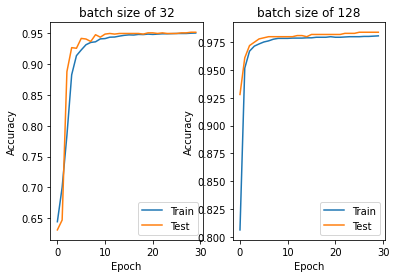

In [ ]:
plt.figure()
plt.subplot(121)
plt.plot(AE_history.history['accuracy'])
plt.plot(AE_history.history['val_accuracy'])


plt.title('batch size of 32')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])

plt.subplot(122)

plt.plot(AE_history_128.history['accuracy'])
plt.plot(AE_history_128.history['val_accuracy'])

plt.title('batch size of 128')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()
plt.close()

# Compare

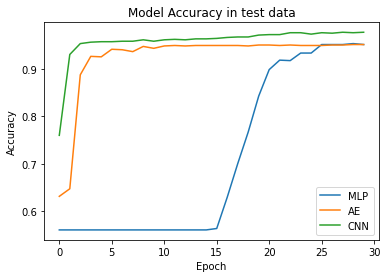

In [ ]:
plt.figure()

plt.plot(mlp_history.history['val_accuracy'])
plt.plot(AE_history.history['val_accuracy'])
plt.plot(CNN_history.history['val_accuracy'])
AE_history.history['val_accuracy']

plt.title('Model Accuracy in test data')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['MLP', 'AE','CNN'])
plt.show()
plt.close()